## LU decomposition

The fundamental problem of linear algebra is solving the linear system $Ax = b$  if it is even possible. There are many approaches to solving this problem, each with different pros and cons.

The standard approach for solving the linear system $Ax = b$ is reducing the augmented matrix $[A | b]$  to row-echelon form (REF) via Gaussian elimination, then using back substitution. The matrix is in REF when the leading non-zero term in each row is the diagonal term, so the matrix is upper triangular. At each step of the process, there are three possible operations: swapping two rows, multiplying one row by a scalar value, or adding a scalar multiple of one row to another.

In [1]:
import numpy as np
from IPython.display import Image

In [2]:
A = np.array([[1, 1, 1, 1], [1, 4, 2, 3],[4, 7, 8, 9]], dtype=np.float)

In [3]:
# Reduce the 0th column to zeros below the diagonal.

A[1,0:] -= (A[1,0] / A[0,0]) * A[0]
A[2,0:] -= (A[2,0] / A[0,0]) * A[0]

In [4]:
# Reduce the 1st column to zeros below the diagonal.

A[2,1:] -= (A[2,1] / A[1,1]) * A[1,1:]

In [5]:
A

array([[1., 1., 1., 1.],
       [0., 3., 1., 2.],
       [0., 0., 3., 3.]])

Note that the final row operation modifies only part of the third row to avoid spending the computation time of adding 0 to 0. If a 0 appears on the main diagonal during any part of row reduction, the approach given above tries to divide by 0. Swapping the current row with one below it that does not have a 0 in the same column solves this problem. This is equivalent to left-multiplying by a [type II elementary matrix](http://web.mnstate.edu/jamesju/Spr2012/Content/M327Elem&InvMatrices.pdf), also called a *permutation matrix*.

**task**

Write a function which reduces a square matrix A to REF. You may assume that A is invertible and that a 0 will never appear on the main diagonal (so only use type III row reductions, not type II). Avoid operating on entries that you know will be 0 before and after a row operation.

Use *np.random.randint()* for generating small random matrices as test cases.

In [6]:
### YOUR CODE HERE



Gaussian elimination is not always numerically stable. Suppose that, due to roundoff error, we have a matrix with a very small entry on the diagonal.

In [7]:
A = np.array([[np.power(np.float(10), -15), 1], [-1, 0]], dtype=np.float)
A

array([[ 1.e-15,  1.e+00],
       [-1.e+00,  0.e+00]])

$10^{15}$ is essentially zero, but instead of swapping the first and second rows to put the A in REF, a computer might multiply the first row by $10^{15}$ an add it to the second row to eliminate the $-1$. The resulting matrix is far from what we would expect

Round-o↵ error can propagate through many steps in a calculation. NumPy’s routines that employ row reduction use several tricks to minimize the impact of roundoff errors, but beware that these tricks can’t fix every matrix.

The $LU$ decomposition of a square matrix $A$ is a factorization $A = LU$ where $U$ is the upper triangular REF of $A$ and $L$ is the lower triangular product of the type III elementary matrices whose inverses reduce $A$ to $U$. The $LU$ decomposition of $A$ exists when $A$ can be reduced to REF using only type III elementary matrices (no row swaps). However, the rows of A can always be permuted in a way such that the decomposition exists. If $P$ is a permutation matrix encoding the appropriate row swaps, then the decomposition $PA = LU$ always exists.

Suppose A has an LU decomposition (not requiring row swaps). Then $A$ can be reduced to REF with $k$ row operations, corresponding to left-multiplying the type III elementary matrices $E_{1},...,E_{k}$. Because there were no row swaps, each $E_{i}$ is lower triangular, so each inverse $E_{1}$ i is also lower triangular. Furthermore, since the product of lower triangular matrices is lower triangular, $L$ is lower triangular.

$E_{k}...E_{1}A = A \rightarrow A = (E_{k}...E_{1})^{-1}U = E_{1}^{-1}...E_{k}^{-1}U = LU$

We can thus compute L by right-multiplying the identity by the matrices used to reduce U. However, in this special situation, each right-multiplication only changes one entry of L, so we can avoid matrix multiplication altogether. The entire process, only slightly different than row reduction.

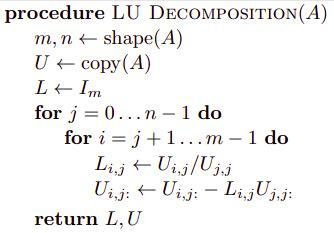

In [8]:
Image("lu.jpg")

**task**

Write a function that finds the LU decomposition of a square matrix. You may assume the decomposition exists and requires no row swaps.

In [9]:
### YOUR CODE HERE


## Forward and Backward Substitution

If $Ax = b$ and $PA = LU$, then $LUx = P$, $Ax = Pb$. This system can be solved by first solving $Ly = Pb$, then $Ux = y$. Since $L$ and $U$ are both triangular, these systems can be solved with backward and forward substitution. We can thus compute the LU factorization of $A$ once, then use substitution to eciently solve $Ax = b$ for various values of $b$.

Since the diagonal entries of $L$ are all 1, the triangular system $Ly = b$ and $Ux = b$ have the following forms:

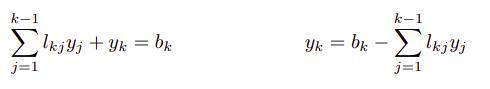

In [10]:
Image("l1.jpg")

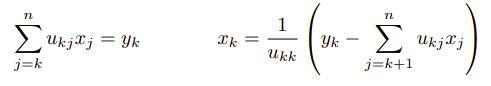

In [11]:
Image("l2.jpg")

**task** 

Write a function that, given $A$ and $b$, solves the square linear system $Ax = b$. Use the function from task 2 to compute $L$ and $U$, then use upper equations to solve for $y$, then $x$. You may again assume that there are no row swaps (so $P = I$ in this case).

In [12]:
### YOUR CODE HERE


## Fast LU

LU Algorithm uses two loops to compute the LU decomposition. With a little vectorization, the process can be reduced to a single loop.

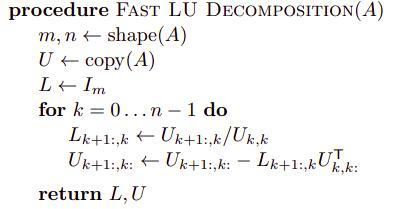

In [13]:
Image("fastlu.jpg")

Note that step 7 is an outer product, not the regular dot product ($xy^{T}$ instead of the usual $x^{T}y$). Use *np.outer()* instead of *np.dot()* to get the desired result.

**task** 

Implement Fast LU

In [14]:
### YOUR CODE HERE


The LU decomposition can also be used to compute inverses and determinants.

**Inverse**. $(PA)^{-1} = (LU)^{-1} \rightarrow LUA^{-1} = P$

**Determinant** $det(A) = det(P^{-1}LU) = \frac{det(L)det(U)}{det(P)}$

## The Cholesky Decomposition

A square matrix A is called positive definite if $z^{T}Az > 0$ for all nonzero vectors $z$. In addition, $A$ is called *Hermitian* if $A = A^{H} = A^{T}$. If A is Hermitian positive definite, it has a Cholesky Decomposition $A = U^{H}U$ where $U$ is upper triangular with real, positive entries on the diagonal. This is the matrix equivalent to taking the square root of a positive real number.

The Cholesky decomposition takes advantage of the conjugate symmetry of $A$ to simultaneously reduce the columns and rows of A to zeros (except for the diagonal). It thus requires only half of the calculations and memory of the LU decomposition. Furthermore, the algorithm is numerically stable, which means that round-off errors do not propagate throughout the computation. Because of its eciency and stability, this decomposition is used when possible to solve least squares, optimization, and state estimation problems.

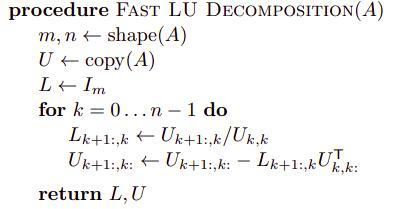

In [15]:
Image("fastlu.jpg")

**task** 

Implement Fast Cholesky decomposition

In [16]:
### YOUR CODE HERE
